<a href="https://colab.research.google.com/github/Melinnaaa/ADA-Informes/blob/main/Informe_CuttingRod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Problema: Corte de varillas**

---

**Entrada**: Largo de varilla $n$, vector de precios por cada medida $i=1..n$

**Salida**:  Retorno máximo $r_n$ que se puede obtener cortando la varilla y vendiendo las partes.

---

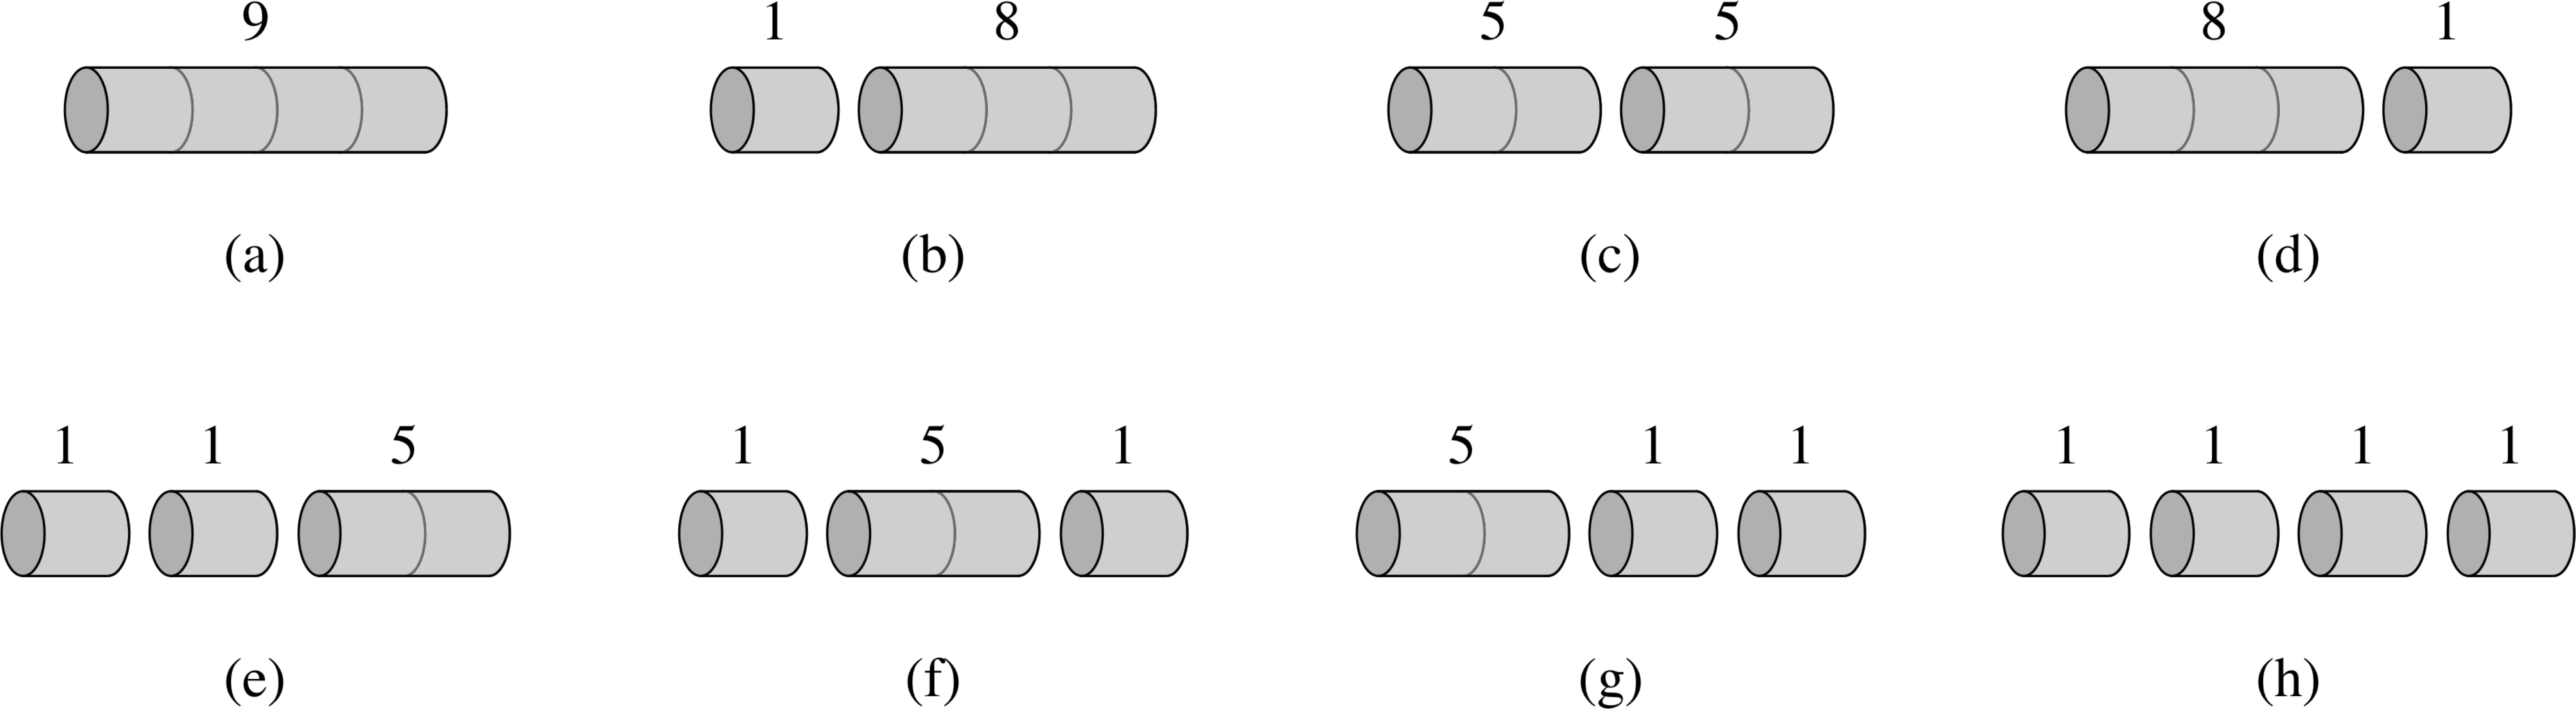

El problema que se abordará en este informe es el **Corte de varillas**, el cual busca la máxima ganancia que se puede obtener al cortar una varilla donde la medida de cada corte tiene un valor establecido.

Para esto se utilizará la programación dinámica, el cual es una solución para los problemas que deben resolver el mismo subproblema repetidas veces, como puede ser la serie de fibonacci recursiva. En este caso, la programación dinámica resuelve cada subproblema una vez y lo almacena en una tabla, de esta manera evitando el trabajo redudante.

# **2. Cutting Rod**

## 2.1 Código

El siguiente código muestra una implementación del algoritmo **Cutting Rod.**

### Cutting Rod Recursivo


In [7]:
import math
from termcolor import colored

def recursiveCutRod(p, n, cont, verbose = False):
  # Caso Base
  if(n <= 0):
    if (verbose == True):
      print("Caso base (largo == 0)\n")      
    return 0
  # Q almacena la mayor ganacia
  q = -math.inf   

  # Se recorre el largo de la barra
  for i in range(n):
    # Se obtiene el costo mayor y aumenta el contador de llamadas recursivas
    cont[0] += 1
    cut = p[i] + recursiveCutRod(p, n - i - 1, cont) 
    q = max(q, cut)
    if (verbose == True):
      print(f"El coste de la varilla de largo {i+1} es {colored(p[i], 'magenta')}")
      print(f"El corte máximo en {i+1} es {colored(cut, 'green')}")
      print(f"El retorno máximo actual es {colored(q, 'blue')}\n")
  # Retornamos el valor de maxima ganancia
  if (verbose == True):
    print(f"Ganancia máxima: {colored(q, 'red')}")
  return q

a = [9, 17, 20, 24, 34, 35, 45, 49, 50, 59]
cont = [0]
cut = [0] * (len(a) + 1)
q = recursiveCutRod(a, len(a), cont)
print("Ganancia maxima: ", q)
print("LLamadas recursivas:", cont[0])

Ganancia maxima:  90
LLamadas recursivas: 1023



### Cutting Rod Dinámico

In [10]:
import math

def dinamicCutRod(p, n, cont, verbose = False):
  # Creamos la tabla de largo n
  val = [0 for x in range(n + 1)]

  # La posición 0 siempre es 0
  if (verbose == True):
    print("El valor del subproblema 0 siempre es 0\n")
  val[0] = 0

  # Recorremos los elementos
  for i in range(1, n+1):
    q = -math.inf   
    if(verbose == True):
        print(f"Cortes posibles para varilla de largo {i}:")
    for j in range(i):
      cont[0] += 1
      if(verbose == True):
        print(f"{colored(p[j] + val[i-j-1], 'green')}", end = " ")
      
      q = max(q, p[j] + val[i-j-1])
      # Se almacenan los subproblemas
    val[i] = q
    if(verbose == True):
      print("")
      print(f"El valor máximo del subproblema {i} = {colored(val[i], 'red')}\n")
  
  if(verbose == True):
    print(f"La ganancia máxima es: {colored(val[n], 'magenta')}")
  
  return val[n]

a = [9, 17, 20, 24, 34, 35, 45, 49, 50, 59]
cont = [0]
# Cortes
cut = [0] * (len(a) + 1)
q = dinamicCutRod(a, len(a), cont)
print("Ganancia maxima:", q)
print("Cantidad de subproblemas resueltos:", cont[0])
print("Mejor corte:", cut[len(a)])

Ganancia maxima: 90
Cantidad de subproblemas resueltos: 55
Mejor corte: 0


## 2.2. Descripción del algoritmo

### Cutting Rod Dinámico

**SubEstructura Optima**

Para una varilla de largo $n$ el retorno máximo esta dado por dos casos:
* La varilla completa $p_n$.
* Una sub-varilla $p_i$, más el retorno máximo $q$ de la varilla restante.


**Función recursiva para el retorno maximo**

$q = max(p_i + r_{n-1})$

***Cutting Rod***

**Paso 1**: Creación del vector para registrar los datos de los subproblemas que se irán resolviendo de menor a mayor tamaño **(acercamiento bottom-up)**.

**Paso 2**: Se comienza resolviendo el problema más pequeño encontrando su solución más óptima y guardandola en el vector de resultados de los subproblemas. Esto se repite hasta cubrir el largo de toda la barra.

**Paso 3**:Finalmente se retorna la posición $n$ del vector, la cual almacena el valor optimo.

### Cutting Rod Recursivo

Se define una variable $q$, la cual almacenará la ganancia máxima de la barra,esta se irá actualizando en la ejecución del algoritmo. Esta variable comienza con un valor minimo para poder realizar las comparaciones de manera correcta.

Primero que todo se recorre mediante un ciclo todos los subproblemas, partiendo desde $0$ hasta el largo de $n$ de la barra, mediante una variable $i$.

Este corte da origen a dos barras, una de largo $n$ y otra de largo $n-i$, el costo de la varilla de largo $i-1$ se debe resolver de manera recursiva.

Se suman las ganancias de las dos barras $p[i]$ y $p[i-1]$, y luego se llama a la función $max$ para comparar si el corte es mayor a $q$, de ser así se actualiza la variable.

Al finalizar el algoritmo se retorna la ganancia máxima que se puede obtener de dicha varilla ($q$).

## 2.3. Ejemplo


Dado el siguiente arreglo de precios $[1,3,4]$ de largo 3.

El primer caso que uno podría considerar es la barra sin cortes. Esto es equivalente a un corte en el índice $0$. El cual produce, en este caso una ganancia $4$, por lo cual la ganancia máxima es 4.

El segundo caso es Considerando un corte en la primera posición. Esto da origen a dos barras, una de largo 1 y otra de largo 2. La ganancia de la barra de largo 1 es fácilmente obtenible del arreglo de precios ($1$), sin embargo la de largo dos tiene que ser calculada, pues puede que su máximo posea cortes en la barra.

Una barra de tamaño dos tiene la opción de estar cortada o entera, las ganancias de estas dos opciones son $2$ y $3$ respectivamente. Por lo que la ganancia máxima sigue siendo 4.

Por lo que la ganancia generada por una barra de largo 1 y otra de largo 2 es de 4. Por lo cual la ganancia máxima se sigue manteniendo.

Como podemos notar la ganancia máxima de esta barra es $4$, el cual puede ser otorgado al tomar la barra entera o por una barra de largo 1 y otra de largo 2.

Para obtener los cortes del ejemplo se realiza lo siguiente:

Consideremos la varilla $c = [1,3,4]$

Para obtener el valor máximo se hace lo siguiente utilizamos la siguiente función: $max_{i...n} = (p_i + r_{n-i})$

Donde $c_n$ es el costo de la varila en la posición $n$ y $r$ el vector de precios en la posición $n-i$.

$P_0$ = 0

**n = 1**

$P_1$ = $c_1$ + $P_0$ = 1

**n = 2**

$P_1$ = $c_1$ + $r_{2-1}$ = 2

$P_2$ = $c_2$ + $r_{2-2}$ = 3

**n = 3**

$P_1$ = $c_1$ + $r_{3-1}$ = 4

$P_2$ = $c_2$ + $r_{3-2}$ = 3

$P_3$ = $c_3$ + $r_{3-3}$ = 4

Por lo tanto el valor máximo posible es **4**

## 2.4. Ejecución del algoritmo paso a paso $(verbose = True)$

Utilizando la opción $verbose = True$, podemos ver lo que ocurre en cada iteración del algoritmo.

### $verbose$ algoritmo recursivo.

In [8]:
a = [9, 17, 20, 24, 34, 35, 45, 49, 50, 59]
cont = [0]
cut = [0] * (len(a) + 1)
q = recursiveCutRod(a, len(a), cont, verbose = True)

El coste de la varilla de largo 1 es 9
El corte máximo en 1 es 90
El retorno máximo actual es 90

El coste de la varilla de largo 2 es 17
El corte máximo en 2 es 89
El retorno máximo actual es 90

El coste de la varilla de largo 3 es 20
El corte máximo en 3 es 83
El retorno máximo actual es 90

El coste de la varilla de largo 4 es 24
El corte máximo en 4 es 78
El retorno máximo actual es 90

El coste de la varilla de largo 5 es 34
El corte máximo en 5 es 79
El retorno máximo actual es 90

El coste de la varilla de largo 6 es 35
El corte máximo en 6 es 71
El retorno máximo actual es 90

El coste de la varilla de largo 7 es 45
El corte máximo en 7 es 72
El retorno máximo actual es 90

El coste de la varilla de largo 8 es 49
El corte máximo en 8 es 67
El retorno máximo actual es 90

El coste de la varilla de largo 9 es 50
El corte máximo en 9 es 59
El retorno máximo actual es 90

El coste de la varilla de largo 10 es 59
El corte máximo en 10 es 59
El retorno máximo actual es 90

Ganancia 

### $verbose$ algoritmo dinámico.

In [ ]:
a = [9, 17, 20, 24, 34, 35, 45, 49, 50, 59]
cont = [0]
q = dinamicCutRod(a, len(a), cont, verbose = True)

El valor del subproblema 0 siempre es 0

Cortes posibles para varilla de largo 1:
9 
El valor máximo del subproblema 1 = 9

Cortes posibles para varilla de largo 2:
18 17 
El valor máximo del subproblema 2 = 18

Cortes posibles para varilla de largo 3:
27 26 20 
El valor máximo del subproblema 3 = 27

Cortes posibles para varilla de largo 4:
36 35 29 24 
El valor máximo del subproblema 4 = 36

Cortes posibles para varilla de largo 5:
45 44 38 33 34 
El valor máximo del subproblema 5 = 45

Cortes posibles para varilla de largo 6:
54 53 47 42 43 35 
El valor máximo del subproblema 6 = 54

Cortes posibles para varilla de largo 7:
63 62 56 51 52 44 45 
El valor máximo del subproblema 7 = 63

Cortes posibles para varilla de largo 8:
72 71 65 60 61 53 54 49 
El valor máximo del subproblema 8 = 72

Cortes posibles para varilla de largo 9:
81 80 74 69 70 62 63 58 50 
El valor máximo del subproblema 9 = 81

Cortes posibles para varilla de largo 10:
90 89 83 78 79 71 72 67 59 59 
El valor máximo

#**3. Tiempo de ejecución**

## **Tiempo de ejecución recursivo**

Es posible definir la función de recursión $T(n)$ en términos de todos los sub-problemas posibles (todos los cortes posibles). Esto es lograble iterando $i$ de $0$ hasta $n-1$. Pasando efectivamente por todos los subproblemas. La función de recurrencia $T(n)$ es la siguiente.

$T(n)$ = $\sum\limits_{i=0}^{n-1} i= T(i)$

Para comprobar el tiempo de ejecución se dice que $T(n) = 2^n$ es correcto para un valor de $n$ arbritario. Luego:

$T(n + 1)$ = $T(n) + $$\sum\limits_{i=0}^{n-1} i= T(i)$

Reemplazando, obtenemos:

$T(n + 1) = T(n) + T(n)$

$2 * 2^n = 2^{n+1}$

##**Número de subproblemas realizado**

Para obtener la cantidad de subproblemas podemos acudir a los siguiente:
**Para cada problema $i$ se resuelven $i$ subproblemas**. Luego, podemos plantear la siguiente función para calcular la cantidad total de subproblemas resueltos por el algoritmo:

$\sum\limits_{i=1}^{n} i=\frac{n(n+1)}{2}$

## **Tiempo de ejecución Programación Dinámica**

El tiempo de ejecución de esta rutina es $O(n^2)$ ya que cada subproblema
es resuelto exactamente una vez. Para resolver el subproblema en la posición
$i$, realizamos $i$ iteraciones del ciclo. 

Para calcular esto se define el tiempo de ejecución $T(n)$:

$$
\begin {aligned}
T(n) &= c \sum_{i = 0} ^ {n-1} \sum _ {j = 1}  ^ {i} j \\
&=  c \sum_{i = 0} ^ {n-1} j \\
&=  c \cdot \cfrac {n (n+1)} {2} \\
&=  O(n^2)
\end {aligned}
$$

## **Complejidad espacial**

La complejidad espacial del corte de varillas dinámico es de $O(n)$, ya que este algoritmo utiliza una cantidad de memoria equivalente al largo de la varilla.

### Tiempo de ejecución dinámico

El tiempo de ejecución de esta rutina es 
$O(n^2)$, ya que cada subproblema es resuelto exactamente una vez. Para resolver el subproblema en la posición $i$, realizamos $i$ iteraciones del ciclo.

Para calcular esto se define el tiempo de ejecución $T(n)$:

# **4. Correctitud**

Lema: El arreglo auxiliar posee las soluciones de todos los subproblemas anteriores

**Inicialización**: No existen subproblemas anteriores. $(i=0)$.

**Mantención**: Se calcula el subproblema del corte en la posición actual $(i)$.

**Finalización**: Todos los subproblemas han sido calculados correctamente.

El arreglo auxiliar que guarda los resultados contiene las solución final del problema.

# **5. Experimentos.**

## **5.1. Tiempo de ejecución (Recursivo vs Dinámico)**

En los siguientes gráficos se reporta el tiempo de ejecución del algoritmo **Cutting Rod**, para su versión dinámica y recursiva en función del tamaño del problema para arreglos generados aleatoriamente de tamaños entre $5$ y $20$. A partir de los gráficos obtenidos se realizará una comparación del rendimiento de ambas versiones.

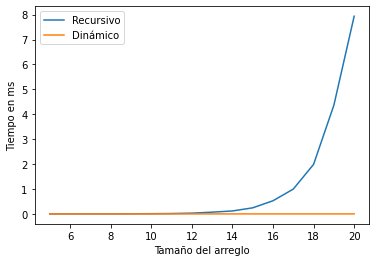

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

# Función brindada por el profesor.
def cutrod_instance_generator(N):
  A = []
  prev = 0
  for i in range(N):
    r=random.randint(0,10)
    A.append(prev+r)
    prev+=r
  return A
  
x=[]; y=[]
y1=[]
for n in range(5,21):

  a = cutrod_instance_generator(n)
  cont = [0]
  verbose = False
  #la función repeat está ejecutando 20 veces cutting rod con el arreglo a y retorna el mejor tiempo obtenido.
  t1 = repeat(setup="from __main__ import recursiveCutRod", stmt=f"recursiveCutRod({a},{n},{cont},{verbose})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import dinamicCutRod", stmt=f"dinamicCutRod({a},{n},{cont},{verbose})", repeat=1, number=10)
  x.append(n)
  y.append(t1)
  y1.append(t2)


plt.plot(x, y)
plt.plot(x, y1)
plt.legend(["Recursivo", "Dinámico"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo en ms')
plt.show()

### **Análisis de resultados**



* Lo primero que podemos observar al ver el gráfico es la gran diferencia que existe en tiempo de ejecución en ambos algoritmos, esto debido a que la implementación recursiva crece de manera exponencial $O(2^n)$, siendo mucho menos eficiente a la implementación dinámica, la cual crece cuadraticamente $O(n^2)$.

## **5.2. Cantidad de problemas**

En el siguiente gráfico se reporta la cantidad de problemas que debe resolver **Cutting Rod** para arreglos de entrada entre $5$ y $500$.

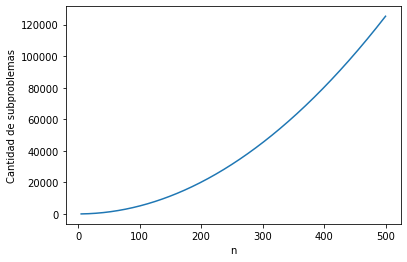

In [ ]:
import matplotlib.pyplot as plt
import random

x = []; y = []; 

for n in range(5,501):
  a = cutrod_instance_generator(n)
  cont = [0]
  dinamicCutRod(a,n,cont)
  x.append(n)
  y.append(cont[0])

plt.plot(x,y)

plt.xlabel('n')
plt.ylabel('Cantidad de subproblemas')
plt.show()

### **Análisis de resultados**

* Lo primero que podemos notar al observar el gráfico, es que crece cuadraticamente, esto debido a su complejidad temporal $O(n^2)$.

* Por otro lado podemos notar que la formula utilizada para obtener la cantidad de subproblemas resueltos funciona de manera correcta, ya que si remplazamos $n = 500$, no da un total de $125.250$ subproblemas resultos, lo cual se ve reflejado en el gráfico.